In [1]:
!pip install catboost
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 20 kB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r'drive/MyDrive/Skripsi/india.csv')

In [4]:
#Dropping unnecessary columns
cols_to_drop = ['Station_Code', 'Locations', 'State', 'Temp', 'Year']
df = df.drop(cols_to_drop, axis=1)

In [5]:
#Seperating X & y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
#Splitting test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
#Applying data standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
#Empty result dataframe
res = pd.DataFrame(index=['precision','recall','f1-score','accuracy'])

In [9]:
#Result Function
def result(clf, Classifier_Name, X_train, X_test):
  #Model Fitting
  clf.fit(X_train, y_train)
  
  #Showing performance result
  y_pred=clf.predict(X_test)
  from sklearn.metrics import classification_report
  clf_res = classification_report(y_test, y_pred, output_dict=True)

  #Append classifier result to result DataFrame
  res[str(Classifier_Name)] = [clf_res['weighted avg']['precision'],
                               clf_res['weighted avg']['recall'], 
                               clf_res['weighted avg']['f1-score'], 
                               clf_res['accuracy']]
  display(res)

  #Creating confusion matrix illustration
  from sklearn.metrics import ConfusionMatrixDisplay
  disp = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, xticks_rotation="vertical", 
    display_labels=['Unsuitable', 'Very Poor', 'Poor', 'Good', 'Excellent'])
  disp.ax_.set_title("Confusion Matrix for " + str(Classifier_Name) + " Classifier")

,Decision Tree
precision,0.993896
recall,0.993311
f1-score,0.993213
accuracy,0.993311


array([ True,  True,  True,  True, False,  True, False])

,DO,pH,EC,BOD,FecalC
0,0.019168,-0.047734,-0.299214,-0.132659,-0.051058
1,-0.945693,-0.047629,-0.128075,0.306043,-0.050704
2,0.984030,-0.046893,-0.279327,-0.183670,-0.050864
3,0.984030,-0.047208,-0.283339,-0.102052,-0.013321
4,0.241829,-0.047103,-0.289968,-0.200674,-0.050989


array([4, 2, 5, 3, 7, 1, 6])

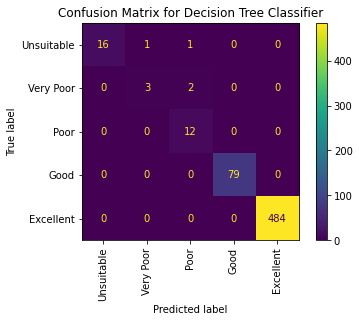

In [10]:
#Using Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

#Wrapper Feature Selection
from sklearn.feature_selection import RFECV
rfe_dt = RFECV(dt_clf)
rfe_dt.fit(X_train,y_train)
X_train_dt = rfe_dt.transform(X_train)
X_test_dt = rfe_dt.transform(X_test)

#Display Result
result(dt_clf, "Decision Tree", X_train_dt, X_test_dt)

#Creating selected features dataframe with corresponding column names
feature_idx_dt = rfe_dt.get_support(indices=True)
feature_names_dt = df.columns[feature_idx_dt]
features_dt = pd.DataFrame(X_train_dt, columns=feature_names_dt)
display(rfe_dt.get_support())
display(features_dt.head())

#Display Feature Ranking
from sklearn.feature_selection import RFE
selector_dt = RFE(dt_clf, step=1, n_features_to_select=1)
selector_dt = selector_dt.fit(X_train,y_train)
selector_dt.ranking_

,Decision Tree,Random Forest
precision,0.993896,0.974578
recall,0.993311,0.976589
f1-score,0.993213,0.974738
accuracy,0.993311,0.976589


array([False,  True,  True, False, False,  True,  True])

,pH,EC,FecalC,TotalC
0,-0.047734,-0.299214,-0.051058,-0.044962
1,-0.047629,-0.128075,-0.050704,-0.044244
2,-0.046893,-0.279327,-0.050864,-0.044703
3,-0.047208,-0.283339,-0.013321,-0.012499
4,-0.047103,-0.289968,-0.050989,-0.044882


array([7, 2, 4, 6, 5, 1, 3])

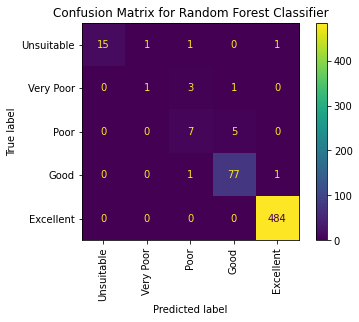

In [11]:
# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

#Wrapper Feature Selection
rfe_rf = RFECV(rf_clf)
rfe_rf.fit(X_train,y_train)
X_train_rf = rfe_rf.transform(X_train)
X_test_rf = rfe_rf.transform(X_test)

#Display Result
result(rf_clf, "Random Forest", X_train_rf, X_test_rf)

#Creating selected features dataframe with corresponding column names
feature_idx_rf = rfe_rf.get_support(indices=True)
feature_names_rf = df.columns[feature_idx_rf]
features_rf = pd.DataFrame(X_train_rf, columns=feature_names_rf)
display(rfe_rf.get_support())
display(features_rf.head())

#Display Feature Ranking
selector_rf = RFE(rf_clf, step=1, n_features_to_select=1)
selector_rf = selector_rf.fit(X_train,y_train)
selector_rf.ranking_

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Decision Tree,Random Forest,SVM
precision,0.993896,0.974578,0.710625
recall,0.993311,0.976589,0.839465
f1-score,0.993213,0.974738,0.769057
accuracy,0.993311,0.976589,0.839465


array([False,  True, False,  True,  True,  True,  True])

,pH,BOD,Nitrate,FecalC,TotalC
0,-0.047734,-0.132659,-0.250175,-0.051058,-0.044962
1,-0.047629,0.306043,3.318200,-0.050704,-0.044244
2,-0.046893,-0.183670,-0.222630,-0.050864,-0.044703
3,-0.047208,-0.102052,2.354112,-0.013321,-0.012499
4,-0.047103,-0.200674,-0.340324,-0.050989,-0.044882


array([7, 2, 6, 5, 4, 1, 3])

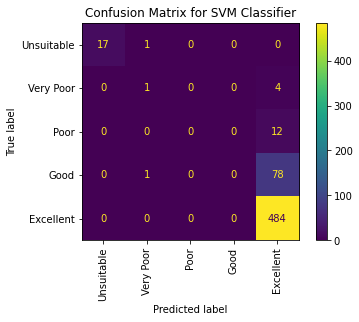

In [12]:
# Using Kernel SVM Classifier
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'linear', random_state = 0)

#Wrapper Feature Selection
rfe_svm = RFECV(svm_clf)
rfe_svm.fit(X_train,y_train)
X_train_svm = rfe_svm.transform(X_train)
X_test_svm = rfe_svm.transform(X_test)

#Display Result
result(svm_clf, "SVM", X_train_svm, X_test_svm)

#Creating selected features dataframe with corresponding column names
feature_idx_svm = rfe_svm.get_support(indices=True)
feature_names_svm = df.columns[feature_idx_svm]
features_svm = pd.DataFrame(X_train_svm, columns=feature_names_svm)
display(rfe_svm.get_support())
display(features_svm.head())

#Display Feature Ranking
selector_svm = RFE(svm_clf, step=1, n_features_to_select=1)
selector_svm = selector_svm.fit(X_train,y_train)
selector_svm.ranking_

In [13]:
# Using Naive Bayes Classifier
#from sklearn.naive_bayes import GaussianNB
#nb_clf = GaussianNB()
#result(nb_clf, "Naive Bayes")

,Decision Tree,Random Forest,SVM,CatBoost
precision,0.993896,0.974578,0.710625,0.988340
recall,0.993311,0.976589,0.839465,0.986622
f1-score,0.993213,0.974738,0.769057,0.985035
accuracy,0.993311,0.976589,0.839465,0.986622


array([False,  True, False,  True, False,  True,  True])

,pH,BOD,FecalC,TotalC
0,-0.047734,-0.132659,-0.051058,-0.044962
1,-0.047629,0.306043,-0.050704,-0.044244
2,-0.046893,-0.183670,-0.050864,-0.044703
3,-0.047208,-0.102052,-0.013321,-0.012499
4,-0.047103,-0.200674,-0.050989,-0.044882


array([7, 2, 6, 4, 5, 1, 3])

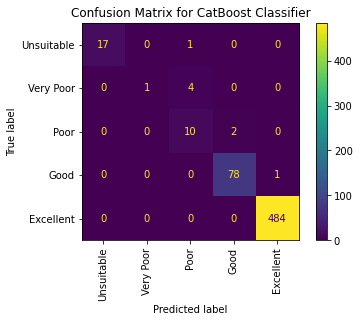

In [14]:
# Using CatBoost Classifier
from catboost import CatBoostClassifier
cb_clf = CatBoostClassifier(random_seed=42, logging_level='Silent')

#Wrapper Feature Selection
rfe_cb = RFECV(cb_clf)
rfe_cb.fit(X_train,y_train)
X_train_cb = rfe_cb.transform(X_train)
X_test_cb = rfe_cb.transform(X_test)

#Display Result
result(cb_clf, "CatBoost", X_train_cb, X_test_cb)

#Creating selected features dataframe with corresponding column names
feature_idx_cb = rfe_cb.get_support(indices=True)
feature_names_cb = df.columns[feature_idx_cb]
features_cb = pd.DataFrame(X_train_cb, columns=feature_names_cb)
display(rfe_cb.get_support())
display(features_cb.head())

#Display Feature Ranking
selector_cb = RFE(cb_clf, step=1, n_features_to_select=1)
selector_cb = selector_cb.fit(X_train,y_train)
selector_cb.ranking_